(precip)=
# Precipitation (MSWEP and CHIRPS)

## Product descriptions

The Multi-Source Weighted-Ensemble Precipitation (MSWEP) is a global 
precipitation dataset that merges precipitation estimates from a variety of 
sources into a single gridded product. The MSWEP dataset available in the SALDi 
Data Cube (SDC) has been acquired from [GloH2O](https://www.gloh2o.org/mswep/) 
with daily, 0.1° (~11 km) resolution.

The product abbreviation used in this package is `mswep`

The Climate Hazards Group InfraRed Precipitation with Station data (CHIRPS) version 3 
product is a 40+ year, high-resolution quasi-global rainfall dataset. Similarly to MSWEP, 
it combines satellite-based precipitation estimates into a spatially and temporally 
consistent gridded time series. This product also integrates insitu station data. 
The CHIRPS dataset available in the SALDi Data Cube (SDC) has been acquired from 
[CHC UCSB](https://www.chc.ucsb.edu/data/chirps3) with monthly, 0.05° (~5 km) resolution.

The product abbreviation used in this package is `chirps`

## Import packages

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from sdc.load import load_product

```{warning}
If you use a vector file to load the MSWEP or CHIRPS data, it might happen that the 
returned xarray DataArray is empty. This can occur when your area of interest is smaller 
than the pixel size of the dataset and happens to "miss" the nearest pixel center. 
This is also shortly documented in [this issue](https://github.com/Jena-Earth-Observation-School/sdc-tools/issues/27).
To avoid this, you can either test if a larger area of interest works or load data for the 
entire SALDi site you are working in and then subset the data to your area of interest.
```

## MSWEP example

In [2]:
mswep = load_product(product="mswep",
                     vec="site06", 
                     time_range=("2018-01-01", "2022-01-01"))
mswep

<xarray.DataArray 'precipitation' (time: 1461, latitude: 11, longitude: 13)> Size: 836kB
array([[[2.50000000e-01, 3.75000000e-01, 3.75000000e-01, ...,
         8.75000000e-01, 1.37500000e+00, 1.43750000e+00],
        [2.50000000e-01, 3.12500000e-01, 3.12500000e-01, ...,
         8.75000000e-01, 1.37500000e+00, 1.43750000e+00],
        [1.87500000e-01, 2.50000000e-01, 2.50000000e-01, ...,
         9.37500000e-01, 8.12500000e-01, 8.12500000e-01],
        ...,
        [5.00000000e-01, 6.87500000e-01, 7.50000000e-01, ...,
         1.37500000e+00, 8.12500000e-01, 8.12500000e-01],
        [5.00000000e-01, 7.50000000e-01, 7.50000000e-01, ...,
         1.43750000e+00, 9.37500000e-01, 8.75000000e-01],
        [1.25000000e-01, 1.06250000e+00, 1.12500000e+00, ...,
         1.81250000e+00, 2.25000000e+00, 2.18750000e+00]],

       [[2.31250000e+00, 3.37500000e+00, 3.06250000e+00, ...,
         4.62500000e+00, 7.25000000e+00, 6.68750000e+00],
        [3.56250000e+00, 3.18750000e+00, 3.06250000e+00, ...,
         4.18750000e+00, 5.93750000e+00, 5.62500000e+00],
        [4.25000000e+00, 1.03125000e+01, 5.87500000e+00, ...,
         3.62500000e+00, 4.75000000e+00, 4.93750000e+00],
...
         1.48750000e+01, 1.19453125e+01, 1.27500000e+01],
        [2.98515625e+01, 3.71718750e+01, 3.89609375e+01, ...,
         1.73750000e+01, 1.40546875e+01, 1.43359375e+01],
        [3.26953125e+01, 3.25390625e+01, 3.83437500e+01, ...,
         1.71718750e+01, 1.79921875e+01, 1.90859375e+01]],

       [[4.53125000e-01, 5.07812500e-01, 5.07812500e-01, ...,
         5.46875000e-02, 3.12500000e-02, 3.12500000e-02],
        [4.68750000e-01, 5.00000000e-01, 4.68750000e-01, ...,
         4.68750000e-02, 3.12500000e-02, 3.12500000e-02],
        [1.31250000e+00, 5.07812500e-01, 4.68750000e-01, ...,
         4.68750000e-01, 3.90625000e-02, 3.90625000e-02],
        ...,
        [6.56250000e-01, 5.62500000e-01, 5.78125000e-01, ...,
         1.32812500e-01, 1.40625000e-01, 1.32812500e-01],
        [6.71875000e-01, 5.85937500e-01, 6.17187500e-01, ...,
         1.48437500e-01, 1.48437500e-01, 1.40625000e-01],
        [8.90625000e-01, 8.75000000e-01, 9.14062500e-01, ...,
         6.25000000e-02, 2.57812500e-01, 2.50000000e-01]]],
      shape=(1461, 11, 13), dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 12kB 2018-01-01 2018-01-02 ... 2022-01-01
  * latitude     (latitude) float32 44B -24.95 -25.05 -25.15 ... -25.85 -25.95
  * longitude    (longitude) float32 52B 30.85 30.95 31.05 ... 31.85 31.95 32.05
    spatial_ref  int32 4B 4326
Attributes:
    units:    mm d-1

In comparison to other datasets, the MSWEP data is not loaded lazily, so you see 
the underlying numpy array when displaying the data. Notice the low spatial 
resolution (0.1° = ~11 km) of the data. The entire SALDi site 06 is covered by 
only 143 pixels:

In [3]:
mswep.shape[1] * mswep.shape[2]

143

As an example, let's plot the precipitation for a point using a 
[Matplotlib stem plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.stem.html#matplotlib.axes.Axes.stem):

In [4]:
mswep_pt = mswep.sel(longitude=31.5384, latitude=-25.0226, method="nearest")

Text(0, 0.5, 'Precipitation [mm/day]')

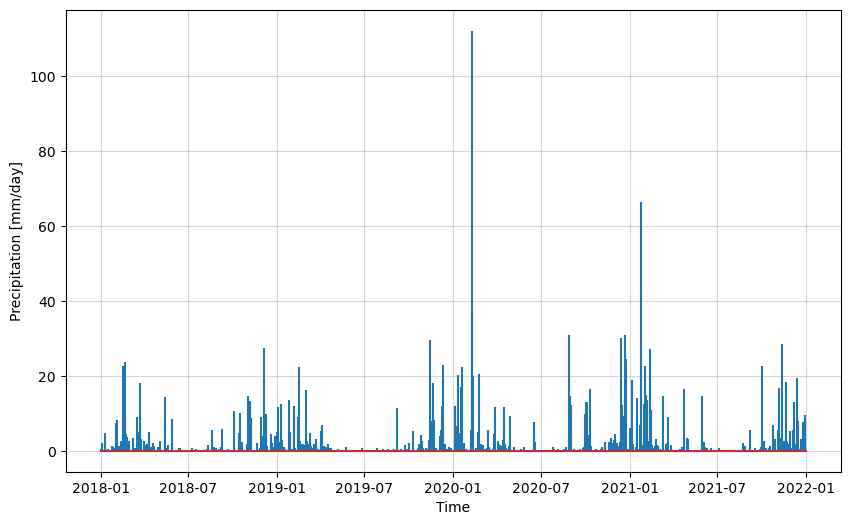

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(mswep_pt.time, mswep_pt, markerfmt="")
ax.grid(True, alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Precipitation [mm/day]")

```{tip}
Even Stackoverflow threads that are more than 9 years old can be helpful 
sometimes 🙂: 
https://stackoverflow.com/questions/26042735/python-matplotlib-stem-plot-with-no-markers
```

## CHIRPS example

CHIRPS data is available for a 40+ year period, so let's load all data available for the 
same site to calculate long-term statistics. Don't worry about loading too much data. 
Because of the low resolution and monthly time step, the total data size in this case is 
only about 1.2 MB.

In [6]:
chirps = load_product(product="chirps", vec="site06")
chirps

<xarray.DataArray (time: 528, latitude: 22, longitude: 26)> Size: 1MB
array([[[360.373   , 381.25592 , 393.65714 , ..., 163.71133 ,
         161.91153 , 149.72266 ],
        [372.7863  , 417.43408 , 414.54425 , ..., 163.38391 ,
         162.06677 , 153.17998 ],
        [396.18085 , 425.69714 , 430.05145 , ..., 166.52878 ,
         167.24496 , 159.05054 ],
        ...,
        [207.82388 , 219.655   , 226.3153  , ..., 168.29129 ,
         178.21489 , 199.62668 ],
        [188.18501 , 224.67062 , 240.18958 , ..., 173.59999 ,
         191.61238 , 209.27744 ],
        [170.63715 , 180.17308 , 201.83875 , ..., 167.0087  ,
         190.08994 , 208.32477 ]],

       [[230.4233  , 258.13226 , 278.1335  , ..., 131.31548 ,
         131.24693 , 136.31024 ],
        [236.85828 , 273.16693 , 287.68823 , ..., 134.94858 ,
         136.34167 , 146.70804 ],
        [235.17365 , 267.10657 , 282.76196 , ..., 112.51571 ,
         115.5153  , 120.03358 ],
...
        [147.03372 , 152.8964  , 148.74081 , ...,  81.440765,
          77.7007  ,  86.26249 ],
        [136.0836  , 155.33276 , 151.62842 , ...,  88.969696,
          80.11787 ,  90.20367 ],
        [126.51878 , 133.8095  , 125.29382 , ...,  75.45819 ,
          88.892914,  88.60953 ]],

       [[155.83394 , 159.77188 , 172.3072  , ...,  77.4873  ,
          76.84388 ,  78.05698 ],
        [162.0739  , 185.19853 , 174.8246  , ...,  76.233055,
          78.209785,  72.60957 ],
        [169.4051  , 174.95306 , 186.82559 , ...,  75.13494 ,
          75.36551 ,  79.64299 ],
        ...,
        [225.47302 , 233.80696 , 235.98016 , ..., 115.94058 ,
         107.69514 , 102.9259  ],
        [222.71065 , 248.35959 , 255.15381 , ..., 103.38594 ,
         105.601845, 106.1416  ],
        [213.41785 , 228.1623  , 221.60959 , ...,  77.07419 ,
          97.32357 , 100.948944]]], shape=(528, 22, 26), dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 4kB 1981-01-01 1981-02-01 ... 2024-12-01
  * latitude     (latitude) float64 176B -24.93 -24.98 -25.03 ... -25.93 -25.98
  * longitude    (longitude) float64 208B 30.78 30.83 30.88 ... 31.98 32.03
    band         int64 8B 1
    spatial_ref  int32 4B 4326
Attributes:
    TIFFTAG_DOCUMENTNAME:      /home/CHIRPS/v3.0/monthly/africa/chirps-v3.0.1...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_SOFTWARE:          IDL 8.9.0, L3Harris Geospatial Solutions, Inc.
    TIFFTAG_DATETIME:          2024:11:27 16:57:13
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0

In [7]:
print(f"Data size: {chirps.nbytes / 1e6} MB")

Data size: 1.208064 MB


We first aggregate the data spatially by calculating the mean value per time step across
the entire site: 

In [8]:
chirps_mean_xy = chirps.mean(dim=["longitude", "latitude"])

As an alternative to the stem plot shown earlier, [Matplotlib's step plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.step.html) is also well suited to visualize precipitation time series:

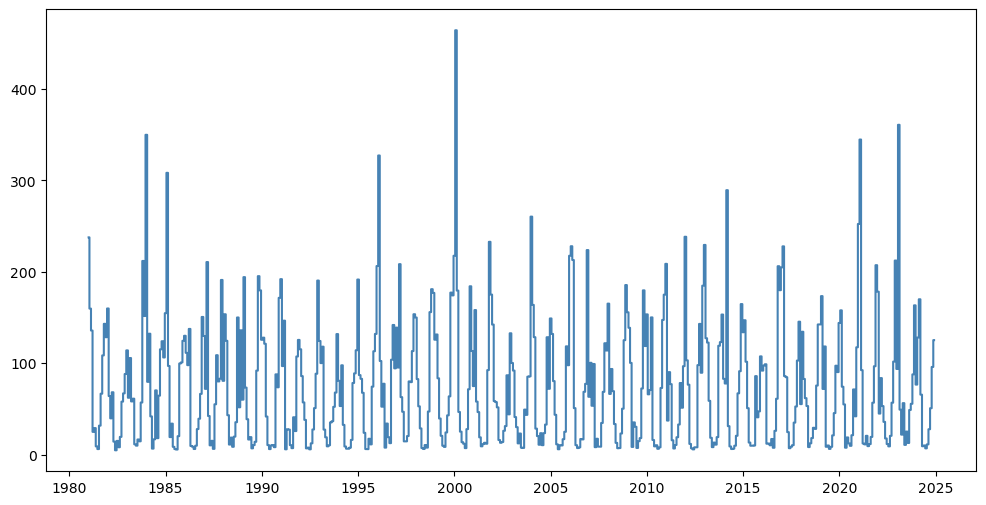

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.step(x=chirps_mean_xy.time, 
        y=chirps_mean_xy, 
        where='mid', color='steelblue')
plt.show()

In [10]:
chirps_mean_xy_subset = chirps_mean_xy.sel(time=slice("2018-01-01", "2024-12-31"))

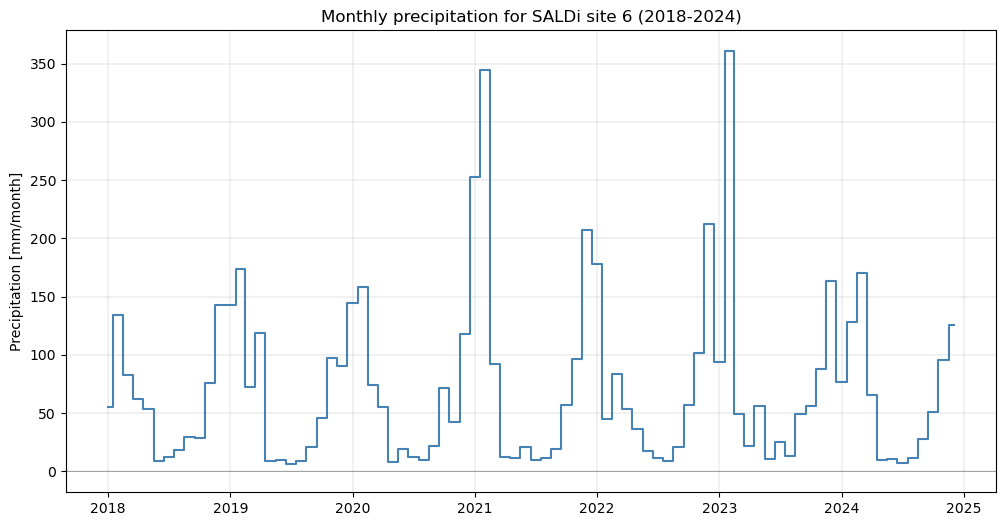

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.grid(which='both', linestyle='-', linewidth=0.25)
ax.axhline(0, color='gray', linewidth=.5, linestyle='-') # plot a thicker line at y=0
ax.step(x=chirps_mean_xy_subset.time, 
        y=chirps_mean_xy_subset, 
        where='mid', color='steelblue')
plt.title('Monthly precipitation for SALDi site 6 (2018-2024)')
plt.ylabel('Precipitation [mm/month]')
plt.show()

One interesting long-term statistic is the average monthly precipitation over the entire
period of record. This can be calculated by grouping the data by month and calculating
the mean for each month. We thereby get 12 values representing the long-term average 
precipitation for each month of the year:

In [12]:
chirps_long_term_monthly_mean = chirps_mean_xy.groupby('time.month').mean(dim='time')
chirps_long_term_monthly_mean

<xarray.DataArray (month: 12)> Size: 48B
array([152.28539 , 141.45778 , 105.80175 ,  50.31505 ,  21.254389,
        11.827967,  12.148655,  14.229453,  33.329124,  72.44721 ,
       112.53735 , 143.33305 ], dtype=float32)
Coordinates:
  * month        (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    band         int64 8B 1
    spatial_ref  int32 4B 4326
Attributes:
    TIFFTAG_DOCUMENTNAME:      /home/CHIRPS/v3.0/monthly/africa/chirps-v3.0.1...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_SOFTWARE:          IDL 8.9.0, L3Harris Geospatial Solutions, Inc.
    TIFFTAG_DATETIME:          2024:11:27 16:57:13
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0

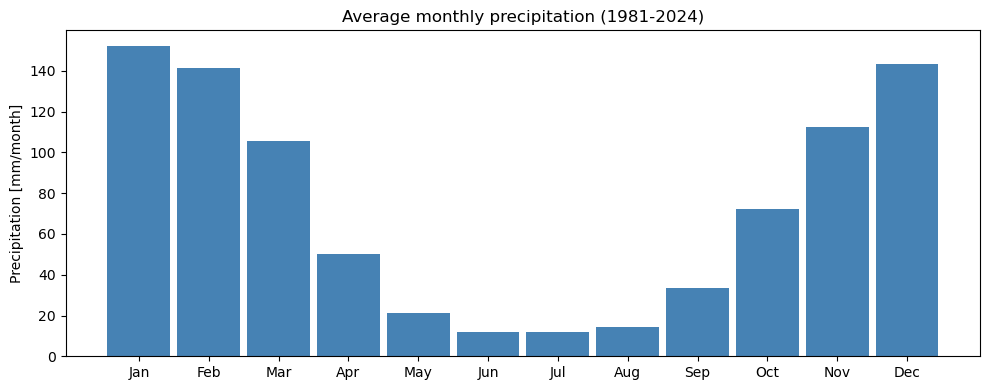

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))

plt.bar(x=chirps_long_term_monthly_mean.month - 1, 
        height=chirps_long_term_monthly_mean,
        width=0.9,
        color='steelblue',
        align='center')
plt.title('Average monthly precipitation (1981-2024)')
plt.ylabel('Precipitation [mm/month]')
plt.xlabel(None)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=month_names, rotation=0)
plt.tight_layout()
plt.show()

Based on this long-term monthly mean, we can calculate monthly anomalies by subtracting
the long-term monthly mean from the original time series. This way, we get a time series
that shows how much wetter or drier each month was compared to the long-term average
for that month:

In [14]:
chirps_long_term_monthly_anomalies = chirps_mean_xy.groupby('time.month') - chirps_long_term_monthly_mean

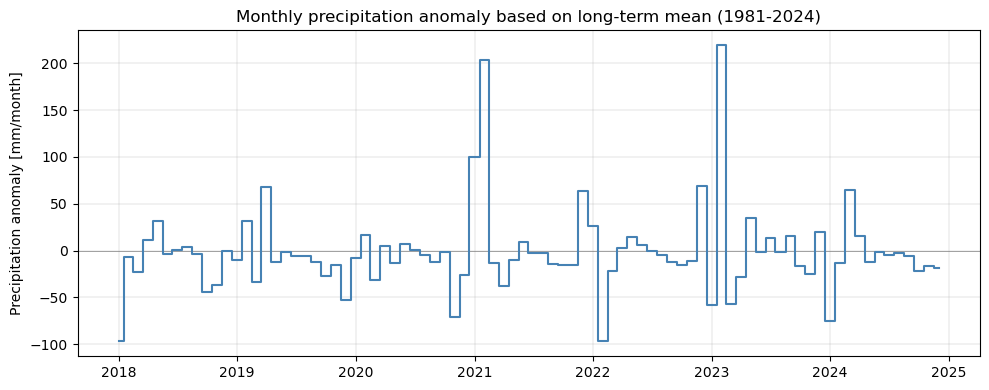

In [15]:
chirps_long_term_monthly_anomalies_subset = chirps_long_term_monthly_anomalies.sel(time=slice("2018-01-01", "2024-12-31"))

fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(which='both', linestyle='-', linewidth=0.25)
ax.axhline(0, color='gray', linewidth=.5, linestyle='-') # plot a thicker line at y=0
ax.step(x=chirps_long_term_monthly_anomalies_subset.time, 
        y=chirps_long_term_monthly_anomalies_subset, 
        where='mid', color='steelblue')
plt.title('Monthly precipitation anomaly based on long-term mean (1981-2024)')
plt.ylabel('Precipitation anomaly [mm/month]')
plt.tight_layout()
plt.show()

To make the anomalies more comparable (e.g., between regions), the standard deviation of 
the long-term monthly anomalies can be calculated and used to normalize the anomalies. 
This way, we get a time series of standardized anomalies that shows how many standard 
deviations each month was above or below the long-term average for that month. You can 
find an example in [this notebook](https://docs.digitalearthafrica.org/en/latest/sandbox/notebooks/Real_world_examples/Rainfall_anomaly_CHIRPS.html).